# Setup

In [1]:
%matplotlib inline

import cv2
import matplotlib.pyplot as plt
import numpy as np
import os

from dotenv import find_dotenv, load_dotenv

In [2]:
load_dotenv(find_dotenv())
repo_dir = os.environ['REPO_DIR']
output_image_dir = os.path.join(repo_dir, 'output_images')

# Get straight line image

(720, 1280, 3)


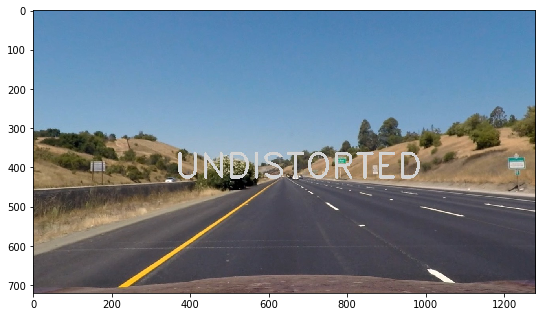

In [3]:
straight_line_img_path = os.path.join(output_image_dir, 'straight_lines1.jpg')

img = cv2.imread(straight_line_img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

print(img.shape)
plt.figure(figsize=(9, 6))
plt.imshow(img)

# View region of interest - `src`

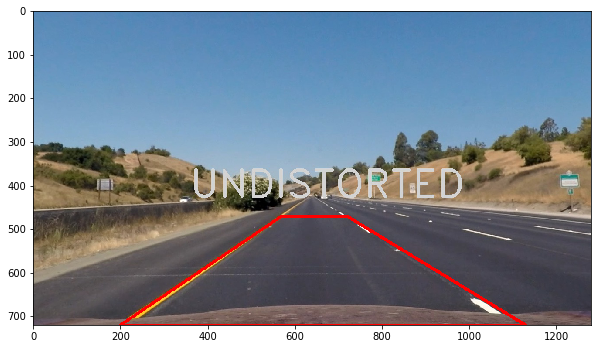

In [5]:
src_list = [(200, 720), (570, 470), (720, 470), (1130, 720)]

src_img = np.copy(img)
src_img = cv2.polylines(src_img, np.array([src_list]), True, color=(255, 0, 0), thickness=5)

plt.figure(figsize=(10,10))
plt.imshow(src_img)

# View region of interest - dst

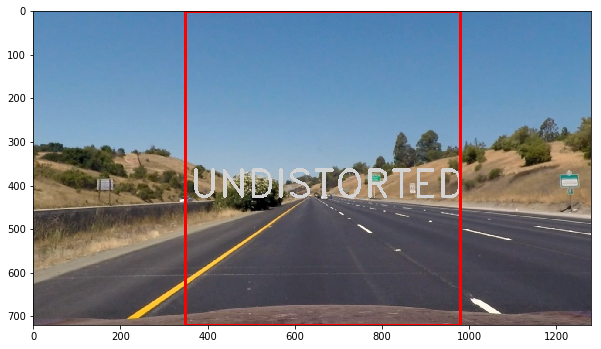

In [9]:
dst_list = [(350, 720), (350, 0), (980, 0), (980, 720)]

dst_img = np.copy(img)
dst_img = cv2.polylines(dst_img, np.array([dst_list]), True, color=(255, 0, 0), thickness=5)

plt.figure(figsize=(10,10))
plt.imshow(dst_img)

# Perform transform

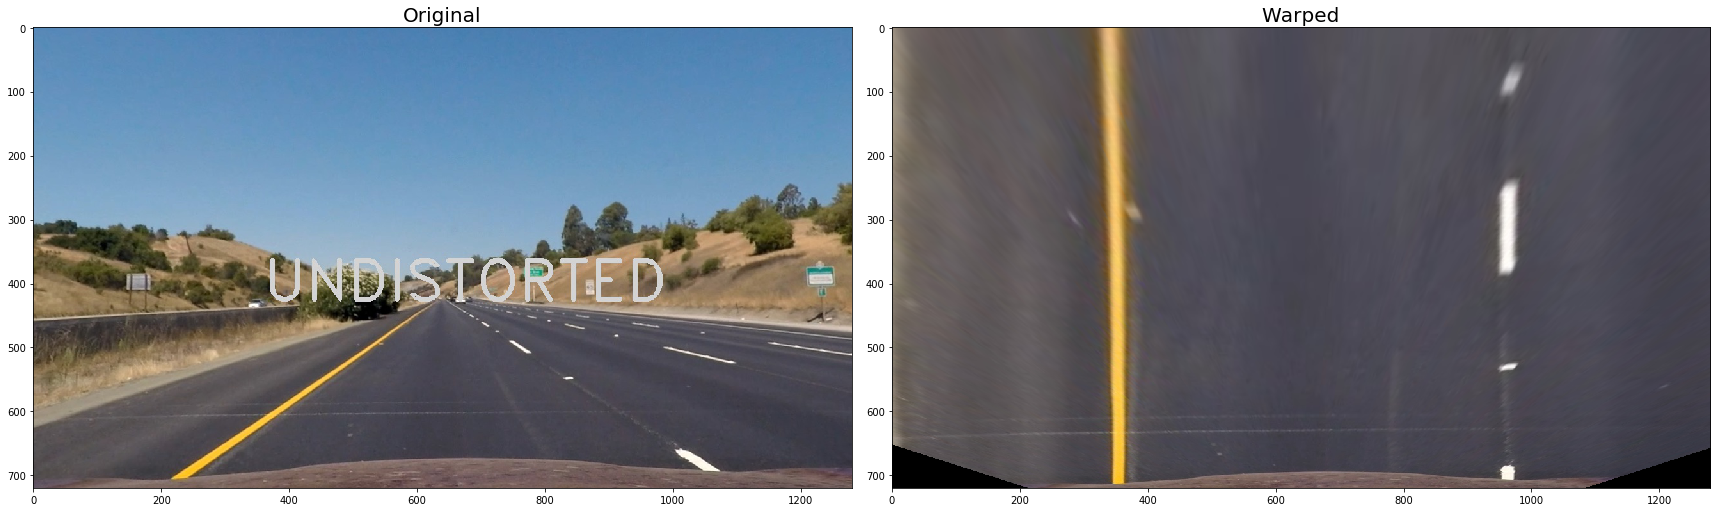

In [24]:
# https://discussions.udacity.com/t/perspective-transform/235255/5?u=adrian_torrie-2
src = np.float32([src_list])
dst = np.float32([dst_list])

M = cv2.getPerspectiveTransform(src, dst)
M_inv = cv2.getPerspectiveTransform(dst, src)

img_size = (img.shape[1], img.shape[0])
warped = cv2.warpPerspective(img, M, img_size, flags=cv2.INTER_LINEAR)

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
ax1.imshow(img)
ax1.set_title('Original', fontsize=20)

ax2.imshow(warped, cmap='gray')
ax2.set_title('Warped', fontsize=20)

f.tight_layout()

# Pipeline functions

In [17]:
def get_perspective_matrices():
    src_list = [(200, 720), (570, 470), (720, 470), (1130, 720)]
    dst_list = [(350, 720), (350, 0), (980, 0), (980, 720)]

    src = np.float32([src_list])
    dst = np.float32([dst_list])

    M = cv2.getPerspectiveTransform(src, dst)
    M_inv = cv2.getPerspectiveTransform(dst, src)

    return M, M_inv

In [18]:
def warper(img, M):
    img_size = (img.shape[1], img.shape[0])
    warped = cv2.warpPerspective(img, M, img_size, flags=cv2.INTER_LINEAR)

    return warped

In [19]:
# get matrices for performing warping
M, M_inv = get_perspective_matrices()

In [20]:
# get image
img = cv2.imread(straight_line_img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

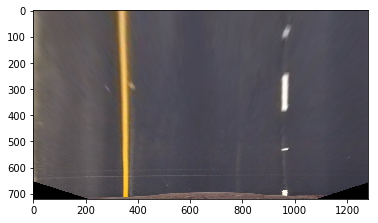

In [22]:
# warp
warped = warper(img, M)
plt.imshow(warped)

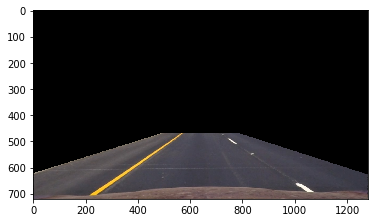

In [23]:
# restore
restored = warper(warped, M_inv)
plt.imshow(restored)